In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [6]:
# Loading the data
df=pd.read_csv('survey lung cancer.csv')
print(df.head(5))

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [7]:
# Displaying DataFrame Information and Statistical Summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
# Removing Duplicates
print("Sum of Duplicate value before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Sum of Duplicate value after :", df.duplicated().sum())

Sum of Duplicate value before: 33
Sum of Duplicate value after : 0


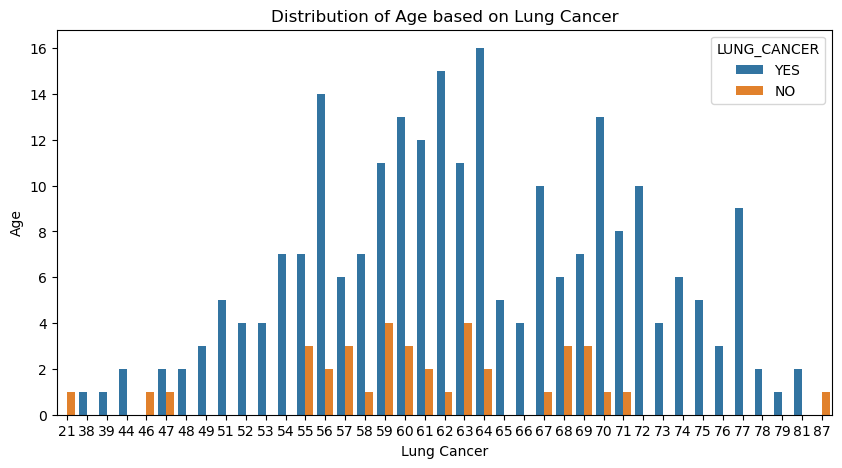

In [9]:
# Visualizing the Distribution of Age Based on Lung Cancer Status

plt.figure(figsize=(10, 5))
sns.countplot(x='AGE',hue='LUNG_CANCER', data=df)
plt.title(f'Distribution of Age based on Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.show()

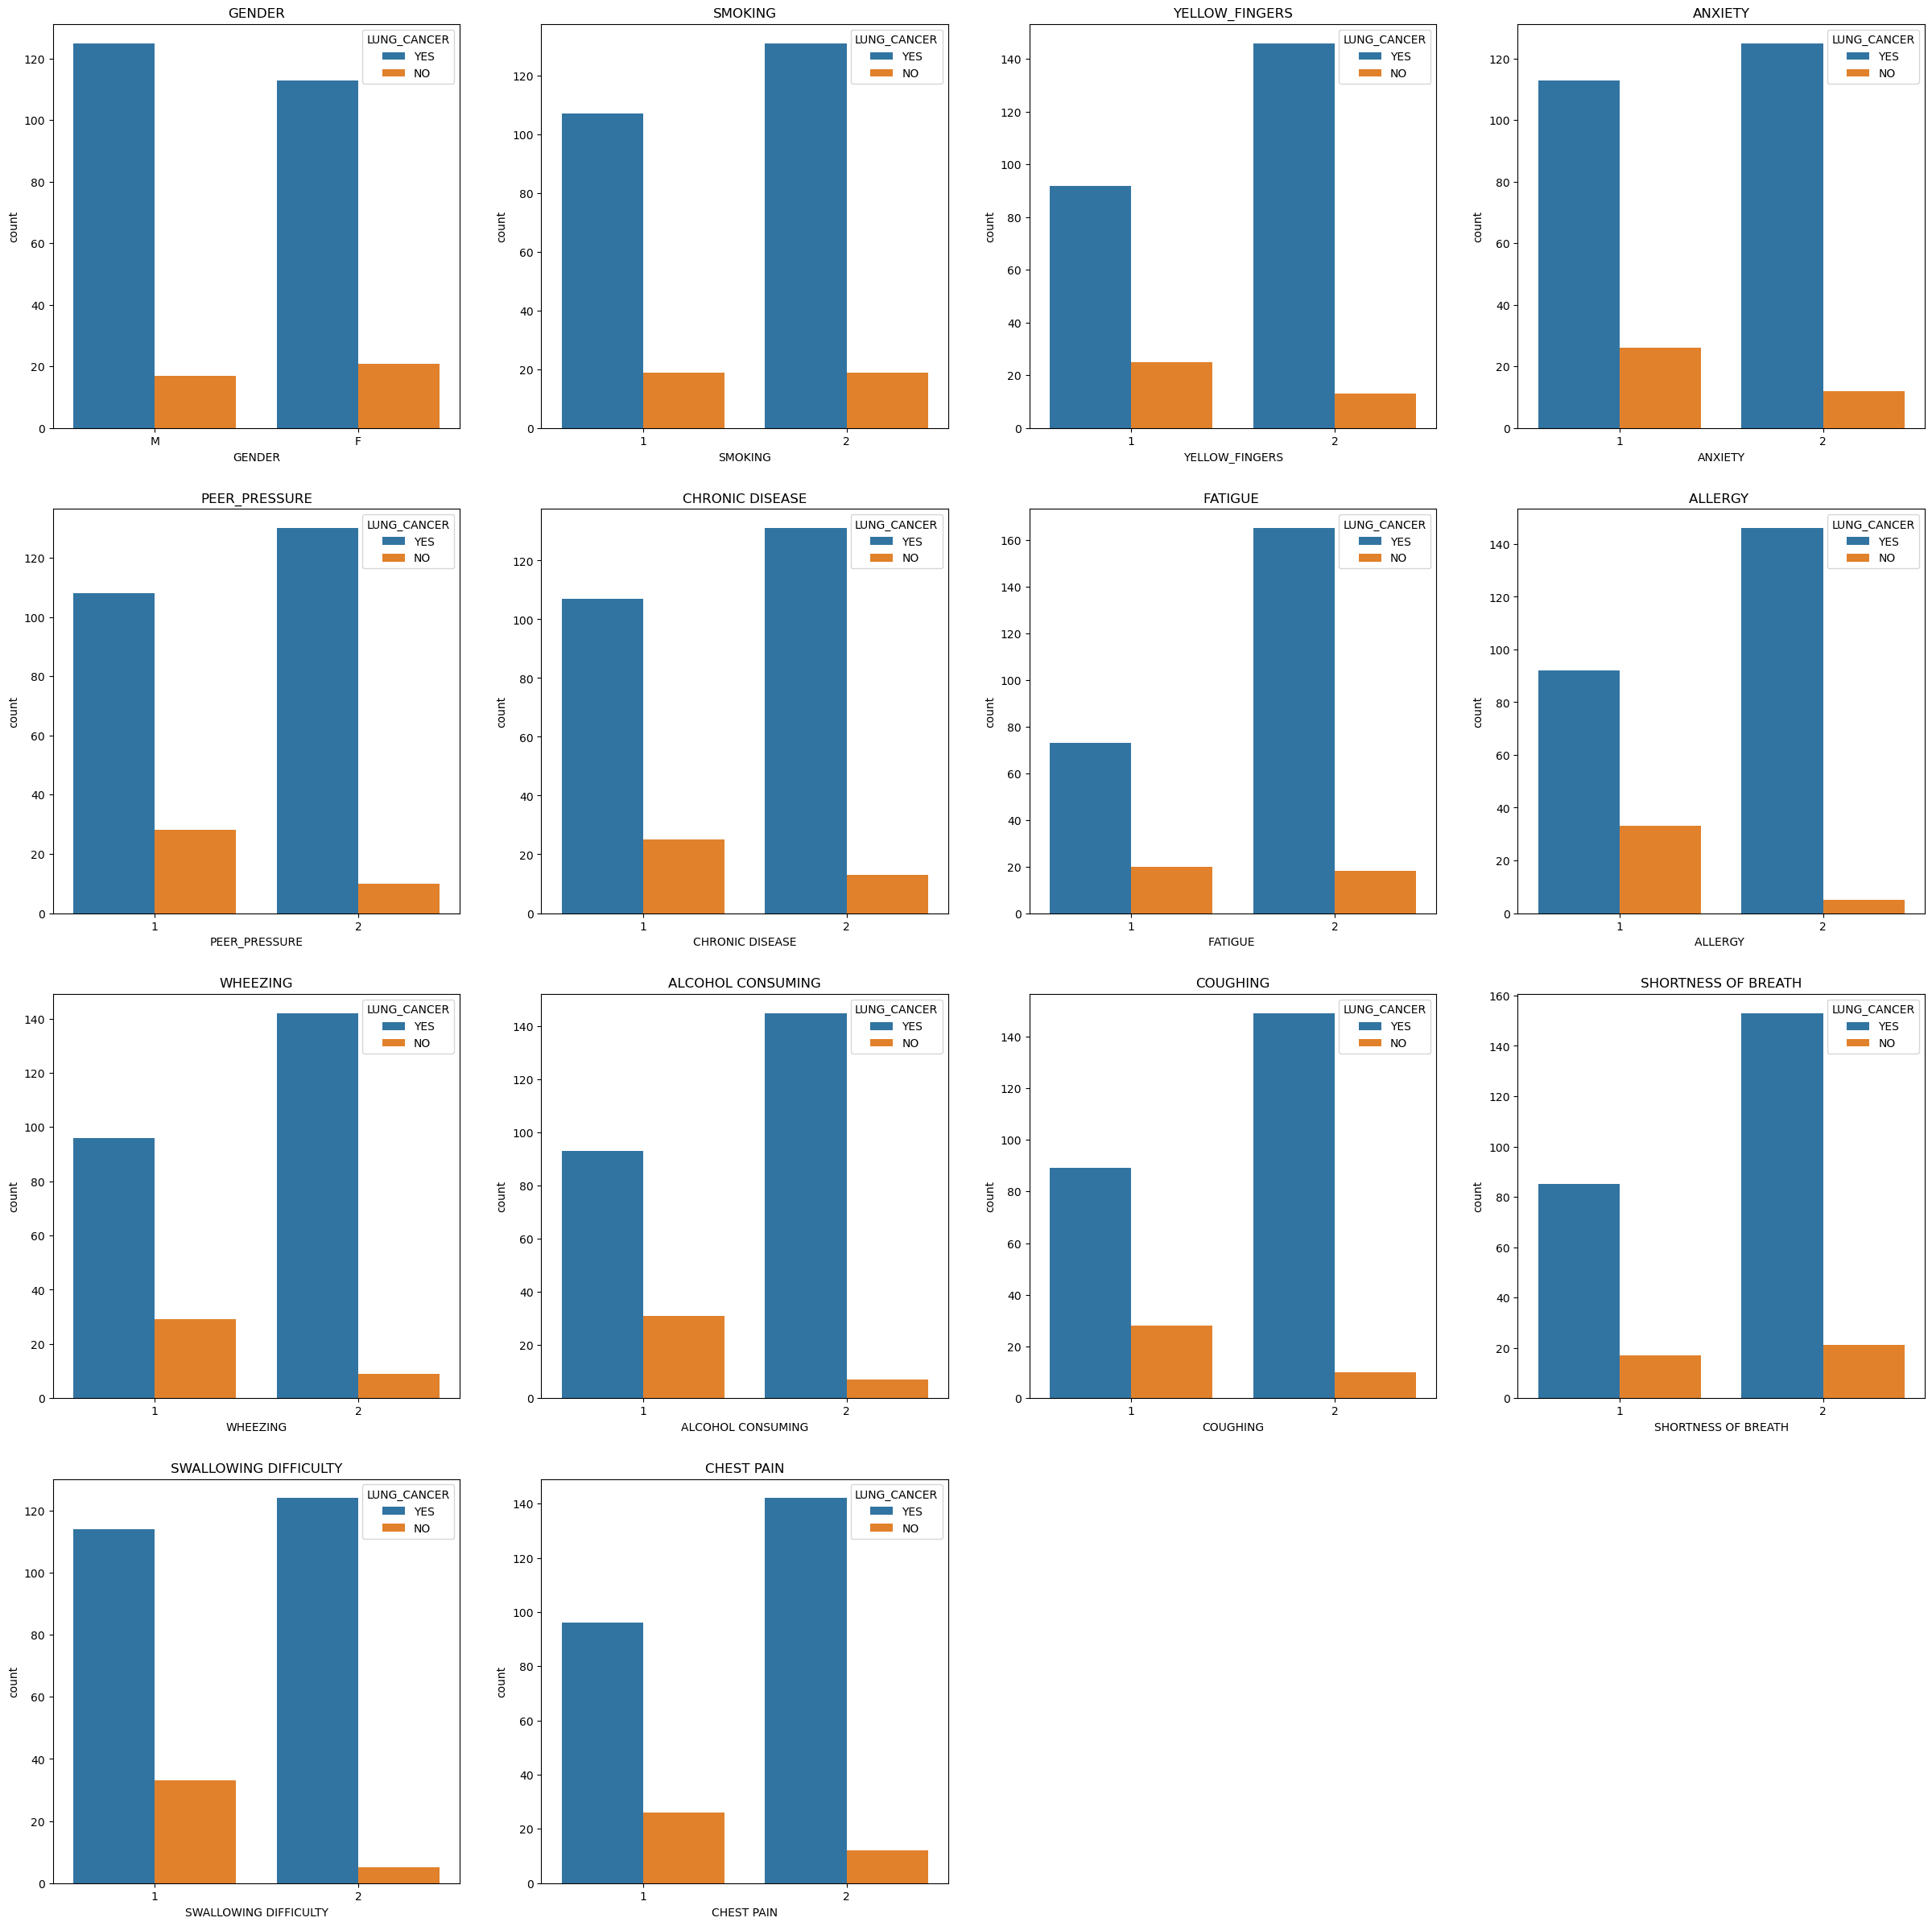

In [10]:
# Visualizing Categorical Features Against Lung Cancer Status
categorical_data=df.drop('AGE',axis='columns')

list=['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE',
      'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
      'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
      'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(30,30))

for i in range(len(list)):
    plt.subplot(4,4,i+1)
    plt.title(list[i])
    sns.countplot(data=categorical_data,x=categorical_data[list[i]],hue='LUNG_CANCER')

In [11]:
#Convert categorical features to numerical using Label Encoding

label_encoder = LabelEncoder()

df['GENDER']= label_encoder.fit_transform(df['GENDER'])
df['GENDER'].unique()

df['LUNG_CANCER']= label_encoder.fit_transform(df['LUNG_CANCER'])
df['LUNG_CANCER'].unique()

array([1, 0])

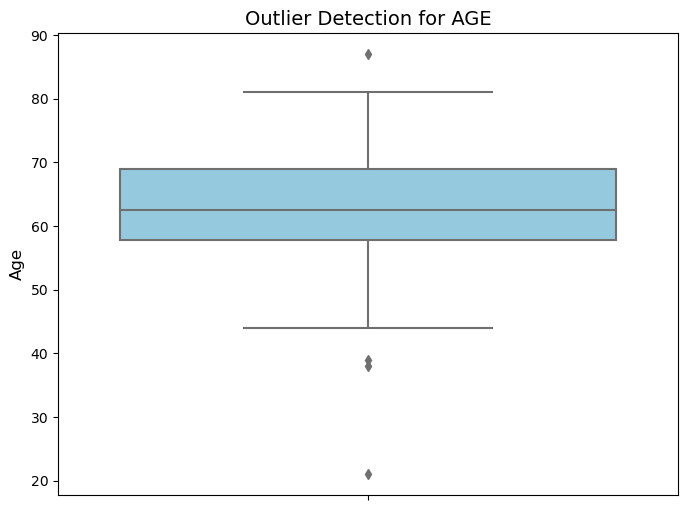

In [12]:
# Plotting a box plot for the AGE column to visualize outliers

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['AGE'], color='skyblue')
plt.title('Outlier Detection for AGE', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.show()

In [13]:
# Remove outliers from the 'AGE' column using the IQR method

Q1 = df.AGE.quantile(0.25)
Q3 = df.AGE.quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the data to remove outliers in the AGE column
new_df = df[(df.AGE>= lower_limit) & (df.AGE <= upper_limit)]

print("Original Data Shape:", df.shape)
print("Cleaned Data Shape:", new_df.shape)

Original Data Shape: (276, 16)
Cleaned Data Shape: (272, 16)


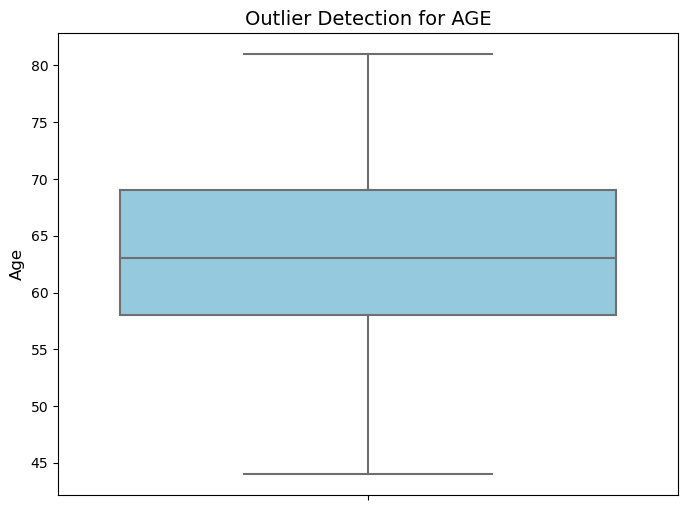

In [14]:
# Visualization after removal of outliers

plt.figure(figsize=(8, 6))
sns.boxplot(y=new_df['AGE'], color='skyblue')
plt.title('Outlier Detection for AGE', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.show()

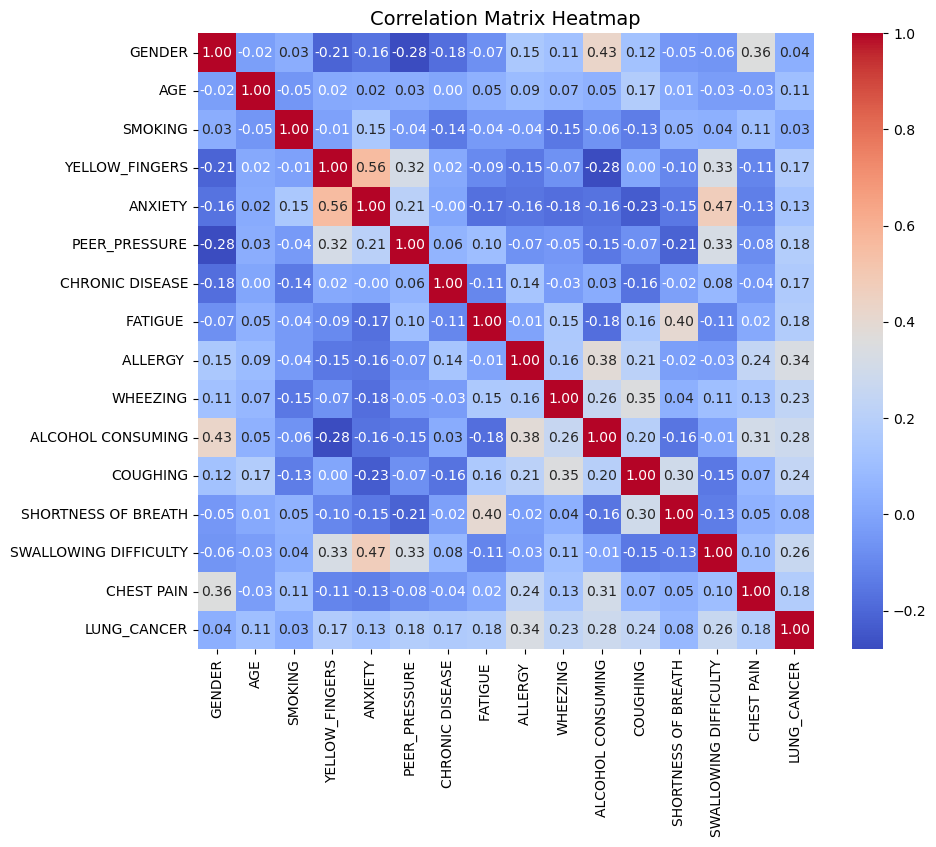

In [15]:
# Calculate the correlation matrix for the cleaned dataset
correlation_matrix = new_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()


In [16]:
# Split Data into Training and Testing Sets

x = new_df.drop('LUNG_CANCER', axis=1)
y = new_df['LUNG_CANCER']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

new_df["LUNG_CANCER"].value_counts(normalize=True)

LUNG_CANCER
1    0.867647
0    0.132353
Name: proportion, dtype: float64

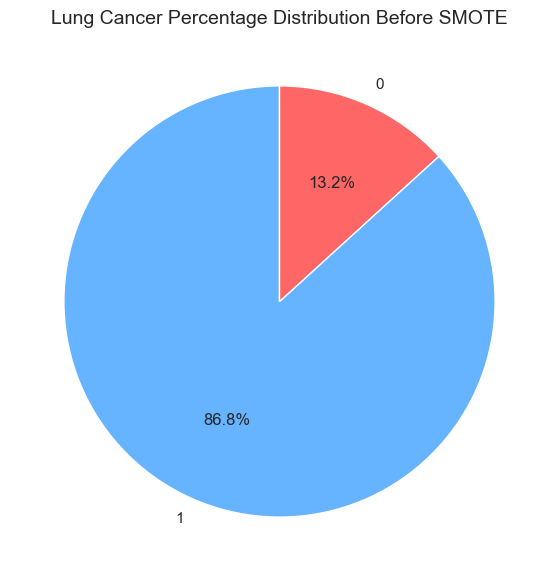

In [17]:
# Plot the pie chart for the 'LUNG_CANCER' column
lung_cancer_counts = new_df["LUNG_CANCER"].value_counts(normalize=True)

# Create the pie chart
plt.figure(figsize=(7, 7))
sns.set_theme(style="whitegrid")
plt.pie(lung_cancer_counts, labels=lung_cancer_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Lung Cancer Percentage Distribution Before SMOTE', fontsize=14)
plt.show()

In [18]:
# Class Balancing using SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

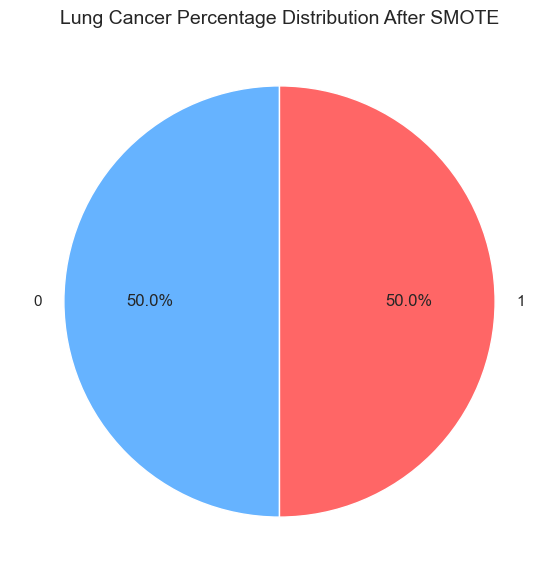

In [19]:
# Check the class distribution after applying SMOTE
smote_class_counts = y_train.value_counts()

# Plot the class distribution using a pie chart
plt.figure(figsize=(7, 7))
sns.set_theme(style="whitegrid")
plt.pie(smote_class_counts, labels=smote_class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Lung Cancer Percentage Distribution After SMOTE', fontsize=14)
plt.show()

In [20]:
# Model Training (Logistic Regression)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9272727272727272

Confusion Matrix:
 [[ 8  0]
 [ 4 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.91      0.96        47

    accuracy                           0.93        55
   macro avg       0.83      0.96      0.88        55
weighted avg       0.95      0.93      0.93        55



In [21]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

# Evaluate the model
y_pred = decision_tree.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8

Confusion Matrix:
 [[ 4  4]
 [ 7 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.91      0.85      0.88        47

    accuracy                           0.80        55
   macro avg       0.64      0.68      0.65        55
weighted avg       0.83      0.80      0.81        55



In [22]:
# Model Training (Random Forest)
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)

# Evaluate the model
y_pred = random_forest.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8545454545454545

Confusion Matrix:
 [[ 4  4]
 [ 4 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.91      0.91      0.91        47

    accuracy                           0.85        55
   macro avg       0.71      0.71      0.71        55
weighted avg       0.85      0.85      0.85        55



In [ ]:
# Model Training (XGBoost)
xgb_model = XGBClassifier(random_state=42)  
xgb_model.fit(x_train, y_train)

# Evaluate the model
y_pred = xgb_model.predict(x_test)
print("xgb Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


xgb Accuracy: 0.8

Confusion Matrix:
 [[ 3  5]
 [ 6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.89      0.87      0.88        47

    accuracy                           0.80        55
   macro avg       0.61      0.62      0.62        55
weighted avg       0.81      0.80      0.80        55



In [24]:
# Model Training (SVM)
svm_model = SVC(kernel='linear', random_state=42, probability=True)  
svm_model.fit(x_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.9272727272727272
Confusion Matrix:
 [[ 7  1]
 [ 3 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.98      0.94      0.96        47

    accuracy                           0.93        55
   macro avg       0.84      0.91      0.87        55
weighted avg       0.94      0.93      0.93        55



### Since The Accuracy of Support Vector Machiene(SVM) is highest So we used it For Predictions In our APP.

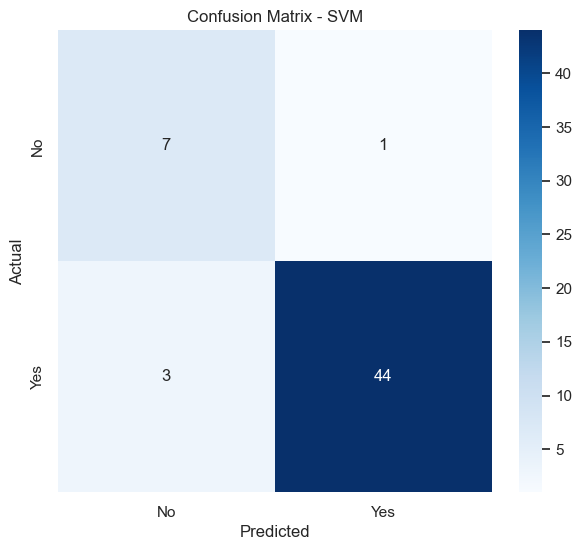

In [25]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap of confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
# Saving the Trained SVM Model (SVM) to a File using Pickle

pickle_out = open("SVC.pkl","wb")
pickle.dump(svm_model, pickle_out)
pickle_out.close()